## Logistic Regression Model Design

This is the Python source code used to build the Logistic Regression model. It is done using Jupyter Notebook.

First, I import all the required modules and libraries.

In [239]:
%matplotlib inline
import pandas as pd
import sys
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In the next step, data is read from a CSV file, and a sample of 10 first rows are displayed. And the shape of the data is shown. Finally, basic statistics from the dataset are displayed.

In [240]:
# Reading the data from CSV file
data = pd.read_csv("Logistic_Regression_data_clean.csv", header=0, sep=',')

In [241]:
#A few rows of data are displayed
data.head(10)

,ROW_NUMBER,SUBGROUP,AVG_SPENDING,TARGET_SPENDING,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,LABEL
0,1,2,22.51,34,92,7,109,93,27,71,0
1,2,1,129.74,162,225,131,41,43,5,57,1
2,3,2,226.23,339,86,156,15,12,21,109,0
3,4,2,177.73,267,123,74,31,32,4,31,0
4,5,3,359.96,720,105,56,169,37,103,136,1
5,6,3,146.66,293,96,53,18,161,3,171,1
6,7,1,314.63,393,202,120,64,35,13,172,1
7,8,3,255.32,511,139,79,36,11,32,102,0
8,9,2,323.24,485,25,183,190,79,58,71,1
9,10,3,399.23,798,271,110,30,72,21,102,1


In [242]:
print("The shape of the data is:", data.shape)

The shape of the data is: (30000, 11)


In [243]:
# Basic statistics of the dataset
data.describe()

,ROW_NUMBER,SUBGROUP,AVG_SPENDING,TARGET_SPENDING,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,LABEL
count,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,2.00000,240.060581,379.998033,125.156967,94.198333,70.881367,53.154500,39.616467,120.398967,0.548467
std,8660.398374,0.81651,125.204707,215.606962,84.349303,67.164752,52.888922,42.000164,32.627681,66.431699,0.497654
min,1.000000,1.00000,2.850000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
25%,7500.750000,1.00000,135.530000,206.000000,55.000000,40.000000,29.000000,21.000000,15.000000,73.000000,0.000000
50%,15000.500000,2.00000,235.340000,362.000000,115.000000,84.000000,60.000000,44.000000,32.000000,106.000000,1.000000
75%,22500.250000,3.00000,343.295000,526.000000,183.000000,136.000000,101.000000,75.000000,56.000000,152.000000,1.000000
max,30000.000000,3.00000,585.500000,1167.000000,436.000000,420.000000,364.000000,331.000000,366.000000,662.000000,1.000000


In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ROW_NUMBER       30000 non-null  int64  
 1   SUBGROUP         30000 non-null  int64  
 2   AVG_SPENDING     30000 non-null  float64
 3   TARGET_SPENDING  30000 non-null  int64  
 4   MONTH_1          30000 non-null  int64  
 5   MONTH_2          30000 non-null  int64  
 6   MONTH_3          30000 non-null  int64  
 7   MONTH_4          30000 non-null  int64  
 8   MONTH_5          30000 non-null  int64  
 9   MONTH_6          30000 non-null  int64  
 10  LABEL            30000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 2.5 MB


### 1. Training the model on the whole dataset

In this section, I train the model on the whole dataset, without separating different groups. This provides general performance on the whole group regardless of the price of the offered discounted package.

In [245]:
# Separate the features into a separate dataframe
X = data.drop('LABEL', axis = 1)\
    .drop('SUBGROUP', axis = 1)\
    .drop('AVG_SPENDING', axis = 1)\
    .drop('TARGET_SPENDING', axis = 1)

# Separate labels into their own numpy array
y = np.array(data['LABEL'])

In [246]:
# A few rows of the X features dataset
X[0:5]

,ROW_NUMBER,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6
0,1,92,7,109,93,27,71
1,2,225,131,41,43,5,57
2,3,86,156,15,12,21,109
3,4,123,74,31,32,4,31
4,5,105,56,169,37,103,136


The label data have already been correctly converted to binary values during the data preprocessing.

In [247]:
# A few rows of the y labels
y[0:5]

array([0, 1, 0, 0, 1], dtype=int64)

In the below, I show the list of columns. Each column represent the total call duration to the specific called party number during one month from the USAGE dataset collected.

In [248]:
# Saving features names in a separate list
feature_list = list(X.columns)
feature_list

['ROW_NUMBER',
 'MONTH_1',
 'MONTH_2',
 'MONTH_3',
 'MONTH_4',
 'MONTH_5',
 'MONTH_6']

In [249]:
# Converting the feature dataframe into a numpy array
X = np.array(X)

In the following I define the Logistic Regression model and generate the 10-fold Cross Validation scores based on Accuracy.

In [250]:
# Define the model
LRModel = LogisticRegression(random_state=42, max_iter=500)

#Evaluate the model with 10-folds Cross Validation
cross_valid = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(LRModel, X, y, scoring='accuracy', cv=cross_valid, n_jobs=-1, error_score='raise')

### 1.1. Logistic Regression model training Accuracy

Below the performance Accuracy achieved with 10-fold cross validation is displayed. It can be noticed that the model achieves a relatively high prediction accuracy during training on the whole data set, and evaluating with 10-fold cross validation.

In [283]:
# report performance
print('Training Accuracy of the Logistic Regression model: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Training Accuracy of the Logistic Regression model: 0.644 (0.045)


In the following the dataset is split into training and testing dataset. The training dataset is used to fit the Logistic Regression model, while the test dataset is used to evaluate performance from data not used in training. The split is performed using 80:20 ratio, with 20% data (i.e. 6000 records) kept aside for testing. A random state of 42 is used to make sure the model can be reproduced for tuning.

In [252]:
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

The Logistic Regression model is then trained and fited with the training dataset together with the training labels.

In [253]:
# Fitting the RF Model on the training dataset
LRModel.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

### 1.2. Confusion Matrix of the Logistic Regression Model

The Logistic Regression model is then used to predict the test dataset, and the performance metrics are extracted. The confusion matrix is also displayed to show how the model behaved.

In [254]:
y_hat = LRModel.predict(X_test)
print(metrics.classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67      2491
           1       0.78      0.72      0.75      3509

    accuracy                           0.72      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.72      0.72      0.72      6000



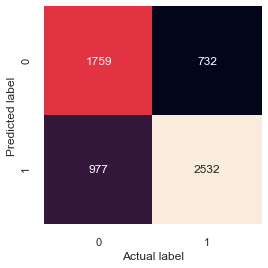

In [255]:
mat = confusion_matrix(y_test, y_hat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual label')
plt.ylabel('Predicted label');

### 1.3. Mean Absolute Error of the Logistic Regression Model

The below shows that the Mean Absolute Error is 0.28 degrees. This is very minimal and shows a good performance.

In [256]:
# Use the forest's predict method on the test data
predictions = LRModel.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (MAE)
print('Mean Absolute Error of the Logistic Regression model:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error of the Logistic Regression model: 0.28 degrees.


### 1.4. AUC-ROC curve of the Logistic Regression Model

In the below section, the AUC-ROC curve is generated. First, the Logistic Regression model is used to predict probabilities. Different thresholds are applied by the roc_curve function on these probabilities, then the ROC curve is generated, and AUC highlighted in the display.

In [257]:
# predict probabilities
pred_prob = LRModel.predict_proba(X_test)

In [258]:
# roc curve for models
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)

The AUC score of the Logistic Regression model can be noticed at 0.778 and it is show bellow.

In [259]:
# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print('AUC Score for the model trained on the complete dataset:',auc_score)

AUC Score for the model trained on the complete dataset: 0.7808111571565761


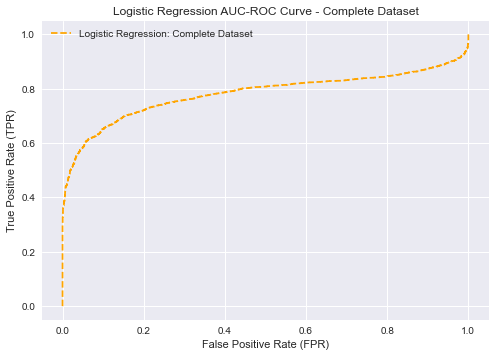

In [260]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression: Complete Dataset')

# title
plt.title('Logistic Regression AUC-ROC Curve - Complete Dataset')

# x label
plt.xlabel('False Positive Rate (FPR)')

# y label
plt.ylabel('True Positive Rate (TPR)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## 2. Training the LR model on Subgroup 1 Dataset

Participants in the first subgroup of 10,000 subscribers were offered a package that provides 3 times more minutes compared to the average monthly minutes used by the participant to call a specific called party number. Out of this subgroup 6,107 participants equivalent to 61% of the participants in the subgroup accepted the package that cost 25% higher than the average they spent on calling the same called party number monthly in the previous 6 months considered in the research. The total spending of all participants in this subgroup is 2,212,635 RWF which means an average of 362.31 RWF per participant.

In this section, the model is trained and evaluated using only Subgroup 1 dataset.

In [261]:
# Extract data related to subscribers in subgroup 1
data_grp_1 = data[data['SUBGROUP'] == 1]

X_grp_1 = data_grp_1.drop('LABEL', axis = 1)\
    .drop('ROW_NUMBER', axis = 1)\
    .drop('SUBGROUP', axis = 1)\
    .drop('AVG_SPENDING', axis = 1)\
    .drop('TARGET_SPENDING', axis = 1)

y_grp_1 = np.array(data_grp_1['LABEL'])
X_grp_1 = np.array(X_grp_1)

In [262]:
# Basic statistics of the dataset
data_grp_1.describe()

,ROW_NUMBER,SUBGROUP,AVG_SPENDING,TARGET_SPENDING,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,LABEL
count,10000.00000,10000.0,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14962.91810,1.0,240.865164,301.087300,126.741000,95.06670,72.057500,53.413600,39.856600,122.888500,0.610700
std,8679.78578,0.0,124.139450,155.177623,86.394626,68.55081,54.318817,42.295485,32.691869,67.777306,0.487616
min,2.00000,1.0,3.280000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,7483.75000,1.0,137.210000,171.750000,55.000000,40.00000,29.750000,21.000000,15.000000,75.000000,0.000000
50%,14974.00000,1.0,236.570000,296.000000,115.000000,84.00000,61.000000,45.000000,32.000000,108.000000,1.000000
75%,22541.25000,1.0,343.702500,430.000000,187.000000,137.00000,103.000000,75.250000,56.000000,155.000000,1.000000
max,30000.00000,1.0,585.500000,732.000000,436.000000,420.00000,354.000000,304.000000,302.000000,662.000000,1.000000


In [263]:
# Define the model for subgroup 1
LRModel1 = LogisticRegression(random_state=42, max_iter=500)

#Evaluate the model with 10-folds Cross Validation
cross_valid_grp_1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_grp_1 = cross_val_score(LRModel1, X_grp_1, y_grp_1, scoring='accuracy', cv=cross_valid_grp_1, n_jobs=-1, error_score='raise')

# report performance on subgroup 1
print('Accuracy for Subgroup 1: %.3f (%.3f)' % (mean(n_scores_grp_1), std(n_scores_grp_1)))

Accuracy for Subgroup 1: 0.684 (0.012)


In [264]:
# Split the data into training and testing datasets, using the 80:20 ratio to keep 20% for testing
X_train_grp_1, X_test_grp_1, y_train_grp_1, y_test_grp_1 = train_test_split(X_grp_1, y_grp_1, test_size = 0.2, random_state = 42)

# Fitting the RF Model on the training dataset
LRModel1.fit(X_train_grp_1, y_train_grp_1)

#Generate the classification report for subgroup 1
y_hat_grp_1 = LRModel1.predict(X_test_grp_1)
print(metrics.classification_report(y_hat_grp_1, y_test_grp_1))

              precision    recall  f1-score   support

           0       0.53      0.63      0.57       650
           1       0.80      0.73      0.76      1350

    accuracy                           0.69      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.71      0.69      0.70      2000



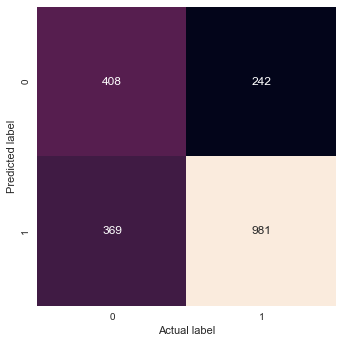

In [265]:
mat_grp_1 = confusion_matrix(y_test_grp_1, y_hat_grp_1)
sns.heatmap(mat_grp_1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual label')
plt.ylabel('Predicted label');

In [266]:
# Use the forest's predict method on the test data
predictions_grp_1 = LRModel1.predict(X_test_grp_1)
# Calculate the absolute errors
errors_grp_1 = abs(predictions_grp_1 - y_test_grp_1)
# Print out the mean absolute error (MAE)
print('Mean Absolute Error for Subgroup 1:', round(np.mean(errors_grp_1), 2), 'degrees.')

Mean Absolute Error for Subgroup 1: 0.31 degrees.


In [267]:
# Generate AUC-ROC curve
# predict probabilities
pred_prob_grp_1 = LRModel1.predict_proba(X_test_grp_1)

# roc curve for models
fpr_grp_1, tpr_grp_1, thresholds_grp_1 = roc_curve(y_test_grp_1, pred_prob_grp_1[:,1], pos_label=1)

# auc scores
auc_score_grp_1 = roc_auc_score(y_test_grp_1, pred_prob_grp_1[:,1])
print('AUC Score for the model trained on Subgroup 1:',auc_score_grp_1)

AUC Score for the model trained on Subgroup 1: 0.7746474426768785


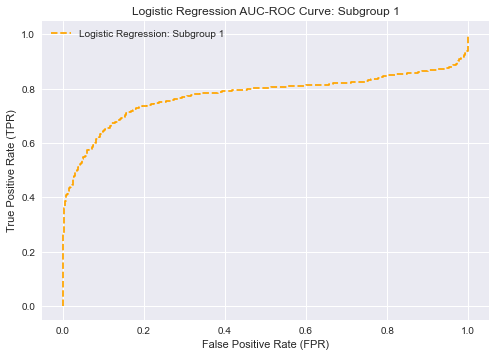

In [268]:
# Plotting the AUC-ROC Curve
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_grp_1, tpr_grp_1, linestyle='--',color='orange', label='Logistic Regression: Subgroup 1')

# title
plt.title('Logistic Regression AUC-ROC Curve: Subgroup 1')

# x label
plt.xlabel('False Positive Rate (FPR)')

# y label
plt.ylabel('True Positive Rate (TPR)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## 3. Training the LR model on Subgroup 2 Dataset

Participants in the second subgroup of 10,000 subscribers were offered a package that provides 6 times more minutes compared to the average monthly minutes used by the participant to call a specific called party number. Out of this subgroup 5,528 participants equivalent to 55% of the participants in the subgroup accepted the package that cost 50% higher than the average they spent on calling the same called party number monthly in the previous 6 months considered in the research. The total spending of all participants in this subgroup is 2,403,228 RWF which means an average of 434.77 RWF per participant.

In this section, the model is trained and evaluated using only Subgroup 2 dataset.

In [269]:
# Extract data related to subscribers in subgroup 2
data_grp_2 = data[data['SUBGROUP'] == 2]

X_grp_2 = data_grp_2.drop('LABEL', axis = 1)\
    .drop('SUBGROUP', axis = 1)\
    .drop('AVG_SPENDING', axis = 1)\
    .drop('TARGET_SPENDING', axis = 1)

y_grp_2 = np.array(data_grp_2['LABEL'])
X_grp_2 = np.array(X_grp_2)

In [270]:
# Define the model for subgroup 2
LRModel2 = LogisticRegression(random_state=42, max_iter=500)

#Evaluate the model with 10-folds Cross Validation
cross_valid_grp_2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_grp_2 = cross_val_score(LRModel2, X_grp_2, y_grp_2, scoring='accuracy', cv=cross_valid_grp_2, n_jobs=-1, error_score='raise')

# report performance on subgroup 2
print('Accuracy for Subgroup 2: %.3f (%.3f)' % (mean(n_scores_grp_2), std(n_scores_grp_2)))

Accuracy for Subgroup 2: 0.650 (0.043)


In [271]:
# Split the data into training and testing datasets, using the 80:20 ratio to keep 20% for testing
X_train_grp_2, X_test_grp_2, y_train_grp_2, y_test_grp_2 = train_test_split(X_grp_2, y_grp_2, test_size = 0.2, random_state = 42)

# Fitting the RF Model on the training dataset
LRModel2.fit(X_train_grp_2, y_train_grp_2)

#Generate the classification report for subgroup 2
y_hat_grp_2 = LRModel2.predict(X_test_grp_2)
print(metrics.classification_report(y_hat_grp_2, y_test_grp_2))

              precision    recall  f1-score   support

           0       0.38      0.62      0.47       541
           1       0.81      0.62      0.70      1459

    accuracy                           0.62      2000
   macro avg       0.59      0.62      0.58      2000
weighted avg       0.69      0.62      0.64      2000



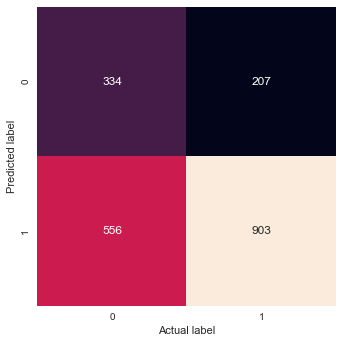

In [272]:
mat_grp_2 = confusion_matrix(y_test_grp_2, y_hat_grp_2)
sns.heatmap(mat_grp_2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual label')
plt.ylabel('Predicted label');

In [273]:
# Use the forest's predict method on the test data
predictions_grp_2 = LRModel2.predict(X_test_grp_2)
# Calculate the absolute errors
errors_grp_2 = abs(predictions_grp_2 - y_test_grp_2)
# Print out the mean absolute error (MAE)
print('Mean Absolute Error for Subgroup 2:', round(np.mean(errors_grp_2), 2), 'degrees.')

Mean Absolute Error for Subgroup 2: 0.38 degrees.


In [274]:
# Generate AUC-ROC curve
# predict probabilities
pred_prob_grp_2 = LRModel2.predict_proba(X_test_grp_2)

# roc curve for models
fpr_grp_2, tpr_grp_2, thresholds_grp_2 = roc_curve(y_test_grp_2, pred_prob_grp_2[:,1], pos_label=1)

# auc scores
auc_score_grp_2 = roc_auc_score(y_test_grp_2, pred_prob_grp_2[:,1])
print('AUC Score for the model trained on Subgroup 2:',auc_score_grp_2)

AUC Score for the model trained on Subgroup 2: 0.67831055774876


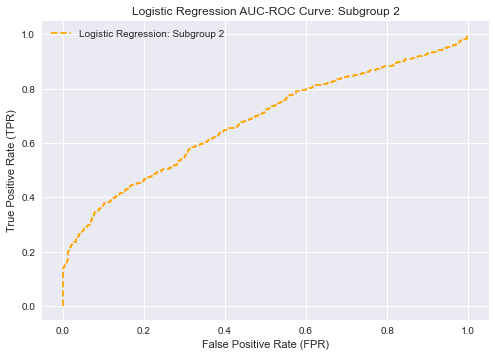

In [275]:
# Plotting the AUC-ROC Curve
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_grp_2, tpr_grp_2, linestyle='--',color='orange', label='Logistic Regression: Subgroup 2')

# title
plt.title('Logistic Regression AUC-ROC Curve: Subgroup 2')

# x label
plt.xlabel('False Positive Rate (FPR)')

# y label
plt.ylabel('True Positive Rate (TPR)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## 4. Training the LR model on Subgroup 3 Dataset

Participants in the first subgroup of 10,000 subscribers were offered a package that provides 10 times more minutes compared to the average monthly minutes used by the participant to call a specific called party number. Out of this subgroup 4,819 participants equivalent to 48% of the participants in the subgroup accepted the package that cost 100% higher than the average they spent on calling the same called party number monthly in the previous 6 months considered in the research. The total spending of all participants in this subgroup is 2,793,565 RWF which means an average of 579.7 RWF per participant.

In this section, the model is trained and evaluated using only Subgroup 3 dataset.

In [276]:
# Extract data related to subscribers in subgroup 3
data_grp_3 = data[data['SUBGROUP'] == 3]

X_grp_3 = data_grp_3.drop('LABEL', axis = 1)\
    .drop('SUBGROUP', axis = 1)\
    .drop('AVG_SPENDING', axis = 1)\
    .drop('TARGET_SPENDING', axis = 1)

y_grp_3 = np.array(data_grp_3['LABEL'])
X_grp_3 = np.array(X_grp_3)

In [277]:
# Define the model for subgroup 3
LRModel3 = LogisticRegression(random_state=42, max_iter=500)

#Evaluate the model with 10-folds Cross Validation
cross_valid_grp_3 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_grp_3 = cross_val_score(LRModel3, X_grp_3, y_grp_3, scoring='accuracy', cv=cross_valid_grp_3, n_jobs=-1, error_score='raise')

# report performance on subgroup 3
print('Accuracy for Subgroup 3: %.3f (%.3f)' % (mean(n_scores_grp_3), std(n_scores_grp_3)))

Accuracy for Subgroup 3: 0.682 (0.077)


In [278]:
# Split the data into training and testing datasets, using the 80:20 ratio to keep 20% for testing
X_train_grp_3, X_test_grp_3, y_train_grp_3, y_test_grp_3 = train_test_split(X_grp_3, y_grp_3, test_size = 0.2, random_state = 42)

# Fitting the RF Model on the training dataset
LRModel3.fit(X_train_grp_3, y_train_grp_3)

#Generate the classification report for subgroup 3
y_hat_grp_3 = LRModel3.predict(X_test_grp_3)
print(metrics.classification_report(y_hat_grp_3, y_test_grp_3))

              precision    recall  f1-score   support

           0       0.83      0.77      0.79      1123
           1       0.73      0.79      0.76       877

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



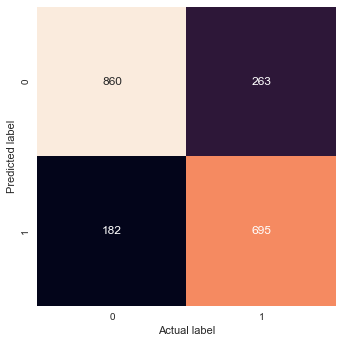

In [279]:
mat_grp_3 = confusion_matrix(y_test_grp_3, y_hat_grp_3)
sns.heatmap(mat_grp_3.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Actual label')
plt.ylabel('Predicted label');

In [280]:
# Use the forest's predict method on the test data
predictions_grp_3 = LRModel3.predict(X_test_grp_3)
# Calculate the absolute errors
errors_grp_3 = abs(predictions_grp_3 - y_test_grp_3)
# Print out the mean absolute error (MAE)
print('Mean Absolute Error for subgroup 3:', round(np.mean(errors_grp_3), 2), 'degrees.')

Mean Absolute Error for subgroup 3: 0.22 degrees.


In [281]:
# Generate AUC-ROC curve
# predict probabilities
pred_prob_grp_3 = LRModel3.predict_proba(X_test_grp_3)

# roc curve for models
fpr_grp_3, tpr_grp_3, thresholds_grp_3 = roc_curve(y_test_grp_3, pred_prob_grp_3[:,1], pos_label=1)

# auc scores
auc_score_grp_3 = roc_auc_score(y_test_grp_3, pred_prob_grp_3[:,1])
print('AUC Score for the model trained on Subgroup 3:',auc_score_grp_3)

AUC Score for the model trained on Subgroup 3: 0.7882244278907994


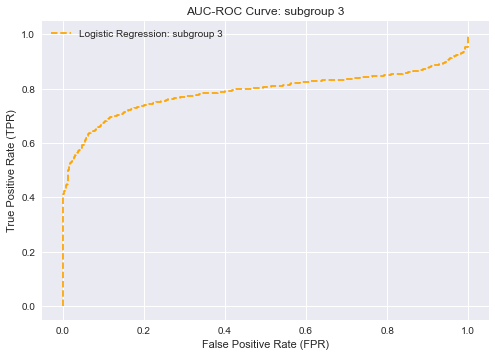

In [282]:
# Plotting the AUC-ROC Curve
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_grp_3, tpr_grp_3, linestyle='--',color='orange', label='Logistic Regression: subgroup 3')

# title
plt.title('AUC-ROC Curve: subgroup 3')

# x label
plt.xlabel('False Positive Rate (FPR)')

# y label
plt.ylabel('True Positive Rate (TPR)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## 5. Conclusion

In general the Logistic Regression model is exhibiting good prediction performance with an AUC value of 0.778. This means that there is a 77.8% chance that the model will be able to distinguish between subscribers who will purchase the discounted package and those that will not.